In [ ]:
from datetime import datetime
from faker import Faker
import random
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
sns.set_palette('rocket')

# Класс Пассажир

In [ ]:
class Passenger:
    """
    Класс для хранения информации о пассажирах авиакомпании.
    - flight_number: str - номер рейса
    - flight_date: datetime - дата рейса
    - name: str - ФИО пассажира
    - seat_number: str - номер места в самолете
    """

    def __init__(self, name, flight_date, flight_number, seat_number) -> None:
        self.flight_number = flight_number
        self.flight_date = flight_date
        self.name = name
        self.seat_number = seat_number

    def __str__(self) -> str:
        return f"'ФИО пассажира: {self.name}\nДата рейса: {self.flight_date}\nНомер рейса: {self.flight_number}\nНомер места: {self.seat_number}'"

    def __eq__(self, passenger: "Passenger") -> bool:
        if not isinstance(passenger, Passenger):
            raise TypeError(f"Сравнение с {type(passenger).__name__} не поддерживается")

        return all(
            [
                self.flight_date == passenger.flight_date,
                self.flight_number == passenger.flight_number,
                self.name == passenger.name,
                self.seat_number == passenger.seat_number
            ]
        )

    def __ne__(self, passenger: "Passenger") -> bool:
        return not self.__eq__(passenger)

    def __lt__(self, passenger: "Passenger") -> bool:
        if not isinstance(passenger, Passenger):
            raise TypeError(f"Сравнение с {type(passenger).__name__} не поддерживается")

        if self.flight_date != passenger.flight_date:
            return self.flight_date < passenger.flight_date
        elif self.flight_number != passenger.flight_number:
            return self.flight_number < passenger.flight_number
        elif self.name != passenger.name:
            return self.name < passenger.name
        else:
            return self.seat_number < passenger.seat_number

    def __le__(self, passenger: "Passenger") -> bool:
        return self.__lt__(passenger) or self.__eq__(passenger)

    def __ge__(self, passenger: "Passenger") -> bool:
        return not self.__lt__(passenger)

    def __gt__(self, passenger: "Passenger") -> bool:
        return not self.__lt__(passenger) and not self.__eq__(passenger)

    def show_info(self):
        print(f'ФИО пассажира: {self.name}\nДата рейса: {self.flight_date}\nНомер рейса: {self.flight_number}\nНомер места: {self.seat_number}')

    def get_data_as_list(self) -> list:
        return [self.name, self.flight_date, self.flight_number, self.seat_number]

# Генерация данных

In [ ]:
def generate_passenger():
    fake = Faker('ru_RU')
    return Passenger(
        name = f"{fake.last_name_male()} {fake.first_name_male()} {fake.middle_name_male()}",
        flight_number = f'{fake.random_uppercase_letter()}{fake.random_uppercase_letter()} {fake.random_int(100, 9999)}',
        flight_date = fake.date_between(start_date="-1y"),
        seat_number = f"{random.randint(1, 20)}{random.choice('ABCD')}")

In [ ]:
def get_list_of_passengers(n = 10):
    passengers = []
    for _ in range(n):
        passengers.append(generate_passenger())
    return passengers

In [ ]:
for n in [100, 500, 1000, 5000, 10000, 50000, 100000, 100500]:
    passengers = get_list_of_passengers(n)
    with open(f'passengers{n}.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Имя пассажира', 'Дата рейса', 'Номер рейса', 'Номер места'])
        for passenger in passengers:
            writer.writerow(passenger.get_data_as_list())

# Считывание данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
passengers = []
for n in [100, 500, 1000, 5000, 10000, 50000, 100000, 100500]:
    tmp = []
    with open(f'/content/drive/MyDrive/data/passengers{n}.csv', 'r') as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            if row:
                passenger = Passenger(*row)
                tmp.append(passenger)
        passengers.append(tmp)

# Сортировки

## Пузырьком

In [ ]:
def bubble_sort(arr: list) -> None:
    for i in range(len(arr)):
        for j in range(len(arr) - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

## Простыми вставками

In [ ]:
def insert_sort(arr: list) -> None:
    for i in range(len(arr)):
        print(i)
        j = i - 1
        key = arr[i]
        while arr[j] > key and j >= 0:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

## Пирамидальная

In [ ]:
def heapify(arr: list, n: int, root: int):
    largest = root
    left_child = 2 * root + 1
    right_child = 2 * root + 2

    if left_child < n and arr[left_child] > arr[root]:
        largest = left_child

    if right_child < n and arr[right_child] > arr[largest]:
        largest = right_child

    if largest != root:
        arr[largest], arr[root] = arr[root], arr[largest]
        heapify(arr, n, largest)

In [ ]:
def heapsort(arr: list):
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

## Сравнение времени работы

In [ ]:
import time

In [ ]:
bubble_sort_time = []

for arr in passengers:
    start = time.time()
    bubble_sort(arr)
    finish = time.time()
    bubble_sort_time.append(finish - start)

In [ ]:
insert_sort_time = []

for arr in passengers:
    start = time.time()
    insert_sort(arr)
    finish = time.time()
    insert_sort_time.append(finish - start)

In [ ]:
heapsort_time = []

for arr in passengers:
    start = time.time()
    heapsort(arr)
    finish = time.time()
    heapsort_time.append(finish - start)

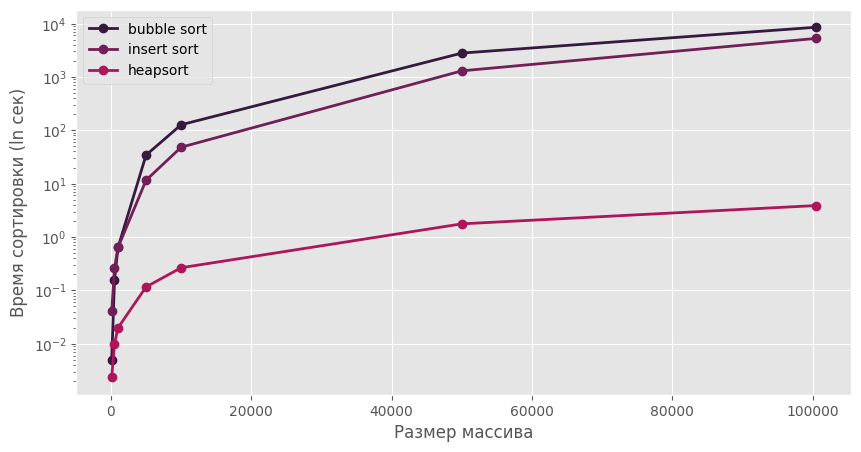

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot([100, 500, 1000, 5000, 10000, 50000, 100500], bubble_sort_time, label='bubble sort', marker='o', linewidth=2)
plt.plot([100, 500, 1000, 5000, 10000, 50000, 100500], insert_sort_time, label='insert sort', marker='o', linewidth=2)
plt.plot([100, 500, 1000, 5000, 10000, 50000, 100500], heapsort_time, label='heapsort', marker='o', linewidth=2)

plt.xlabel("Размер массива")
plt.ylabel("Время сортировки")
plt.yscale('log')

plt.legend()
plt.show()

# Поиск элемента

## Бинарное дерево

In [ ]:
class Node:
    def __init__(self, key, value=None, left=None, right=None):
        self.key = key
        self.value = value
        self.left = left
        self.right = right

In [ ]:
class BinaryTree:
    def __init__(self, arr=None):
        self.root = None

        if arr is not None:
            self.build(arr)

    def insert(self, key, value=None):
        self.root = self._insert(self.root, key, value)

    def _insert(self, root, key, value):
        if root is None:
            return Node(key, value)

        if key < root.key:
            root.left = self._insert(root.left, key, value)
        elif key > root.key:
            root.right = self._insert(root.right, key, value)
        else:
            root.value = value
        return root

    def build(self, arr: list):
        for el in arr:
            self.insert(el.name, el)

    def search(self, key):
        current = self.root

        while current is not None:
            if key < current.key:
                current = current.left
            elif key > current.key:
                current = current.right
            else:
                return current.value

        return None

## Красно-черное дерево

**Свойства**
1.   Корень всегда черный
2.   Листья всегда черные
3.   Каждый красный узел должен иметь 2 черных потомка. Черный узел может иметь черных сыновей.
4.   Пути от узла к его листьям должны содержать одинаковое количество черных узлов

Каждый новый узел - красный.


**Балансировка**
1. Родитель черный -> балансировка не нужна
2. Родителя нет(узел - корень) -> перекрашиваем в черный
3. Красный дядя -> перекрашиваем отца и дядю в черный. Если дед - не корень -> деда в красный.
4. Черный дядя + треугольник -> поворот в обратную сторону относительно сына
5. Черный дядя + линия -> поворот деда в обратную сторону относительно отца + перекрашиваем


In [ ]:
class RBNode:
    def __init__(self, key, value, parent, left, right, color):
        self.key = key
        self.value = value
        self.parent = parent
        self.left = left
        self.right = right
        self.color = color


class RedBlackTree:
    def __init__(self) -> None:
        self.TNULL = RBNode(None, None, None, None, None, 'black')

        self.root = self.TNULL

    def insert(self, key, value):
        node = RBNode(key, value, None, self.TNULL, self.TNULL, 'red')
        y = None
        x = self.root

        while x != self.TNULL:
            y = x

            if node.key < x.key:
                x = x.left
            else:
                x = x.right

        node.parent = y
        if y == None:
            self.root = node
        elif node.key < y.key:
            y.left = node
        else:
            y.right = node

        if node.parent == None:
            node.color = 'black'
            return

        if node.parent.parent == None:
            return

        self.fix_insert(node)

    def search(self, key):
        current = self.root

        while current != self.TNULL:
            if key < current.key:
                current = current.left
            elif key > current.key:
                current = current.right
            else:
                return current.value

        return None

    def fix_insert(self, node):
        while node.parent.color == "red":
            if node.parent == node.parent.parent.right:
                uncle = node.parent.parent.left
                if uncle.color == "red":
                    uncle.color = "black"
                    node.parent.color = "black"
                    node.parent.parent.color = "red"
                    node = node.parent.parent
                else:
                    if node == node.parent.left:
                        node = node.parent
                        self.right_rotate(node)
                    node.parent.color = "black"
                    node.parent.parent.color = "red"
                    self.left_rotate(node.parent.parent)
            else:
                uncle = node.parent.parent.right

                if uncle.color == "red":
                    uncle.color = "black"
                    node.parent.color = "black"
                    node.parent.parent.color = "red"
                    node = node.parent.parent
                else:
                    if node == node.parent.right:
                        node = node.parent
                        self.left_rotate(node)
                    node.parent.color = "black"
                    node.parent.parent.color = "red"
                    self.right_rotate(node.parent.parent)
            if node == self.root:
                break

        self.root.color = "black"

    def left_rotate(self, node):
        rotate_node = node.right
        node.right = rotate_node.left

        if rotate_node.left != self.TNULL:
            rotate_node.left.parent = node

        rotate_node.parent = node.parent

        if node.parent == None:
            self.root = rotate_node
        elif node == node.parent.left:
            node.parent.left = rotate_node
        else:
            node.parent.right = rotate_node

        rotate_node.left = node
        node.parent = rotate_node

    def right_rotate(self, node):
        rotate_node = node.left
        node.left = rotate_node.right

        if rotate_node.right != self.TNULL:
            rotate_node.right.parent = node

        rotate_node.parent = node.parent

        if node.parent == None:
            self.root = rotate_node
        elif node == node.parent.right:
            node.parent.right = rotate_node
        else:
            node.parent.left = rotate_node

        rotate_node.right = node
        node.parent = rotate_node

## Хэш-таблица

In [ ]:
class HashTable:
    def __init__(self, size = 924907):
        self.size = size
        self.collision_count = 0
        self.hash_table = [[] for _ in range(size)]

    def insert(self, key, value):
        hashed_key = hash(key) % self.size

        bucket = self.hash_table[hashed_key]

        found_key = False
        for index, record in enumerate(bucket):
            record_key, _ = record

            if record_key == key:
                found_key = True
                break

        if found_key:
            bucket[index] = (key, value)
        else:
            if bucket:
                self.collision_count += 1

            bucket.append((key, value))

    def search(self, key):
        hashed_key = hash(key) % self.size

        bucket = self.hash_table[hashed_key]

        found_key = False
        for index, record in enumerate(bucket):
            record_key, record_value = record

            if record_key == key:
                found_key = True
                break

        if found_key:
            return record_value
        else:
            return f"{key} not found"

## Сравнение времени работы

In [ ]:
passenger_to_find = dict()

for arr in passengers:
    passenger_to_find[len(arr)] = random.choices(arr)[0].name

In [ ]:
bt_time = []
rb_time = []
hash_time = []
collision = []

In [ ]:
import time

In [ ]:
for arr in passengers:
    bt = BinaryTree(arr)
    start = time.time()
    bt.search(arr[-1].name)
    finish = time.time()
    bt_time.append(finish - start)

In [ ]:
for arr in passengers:
    rb_tree = RedBlackTree()
    for el in arr:
        rb_tree.insert(el.name, el)
    start = time.time()
    rb_tree.search(arr[-1].name)
    finish = time.time()
    rb_time.append(finish - start)

In [ ]:
for arr in passengers:
    ht = HashTable()
    for el in arr:
        ht.insert(el.name, el)
    start = time.time()
    ht.search(arr[-1].name)
    finish = time.time()
    hash_time.append(finish - start)
    collision.append(ht.collision_count)

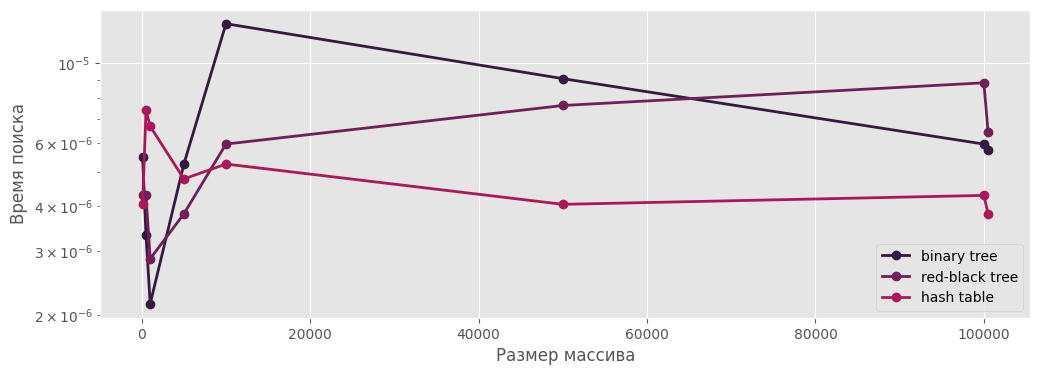

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot([100, 500, 1000, 5000, 10000, 50000, 100000, 100500], bt_time, label='binary tree', marker='o', linewidth=2)
plt.plot([100, 500, 1000, 5000, 10000, 50000, 100000, 100500], rb_time, label='red-black tree', marker='o', linewidth=2)
plt.plot([100, 500, 1000, 5000, 10000, 50000, 100000, 100500], hash_time, label='hash table', marker='o', linewidth=2)

plt.xlabel("Размер массива")
plt.ylabel("Время поиска")
plt.yscale('log')

plt.legend()
plt.show()

In [ ]:
from collections import defaultdict

In [ ]:
multimap_time = []

for arr in passengers:
    multimap = defaultdict(list)
    for el in arr:
        multimap[el.name].append(el)
    start = time.time()
    multimap.get(arr[-1].name)
    finish = time.time()
    multimap_time.append(finish - start)

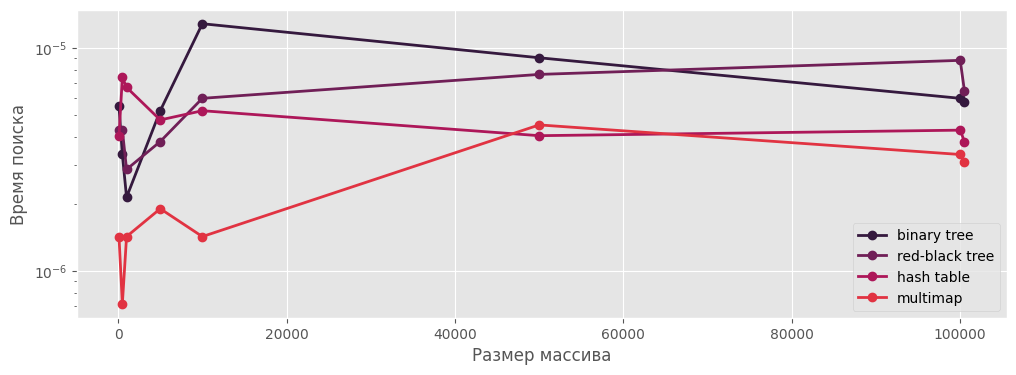

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot([100, 500, 1000, 5000, 10000, 50000, 100000, 100500], bt_time, label='binary tree', marker='o', linewidth=2)
plt.plot([100, 500, 1000, 5000, 10000, 50000, 100000, 100500], rb_time, label='red-black tree', marker='o', linewidth=2)
plt.plot([100, 500, 1000, 5000, 10000, 50000, 100000, 100500], hash_time, label='hash table', marker='o', linewidth=2)
plt.plot([100, 500, 1000, 5000, 10000, 50000, 100000, 100500], multimap_time, label='multimap', marker='o', linewidth=2)

plt.xlabel("Размер массива")
plt.ylabel("Время поиска")
plt.yscale('log')

plt.legend()
plt.show()